In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from causallearn.search.ConstraintBased.PC import pc
from scipy.stats import ks_2samp

import functions
import old_relations,new_relations

In [13]:
low_scatter_para=['ETG','T-type','Bar', 'Disk', 'Ring', 'Core', 'Multiple', 'Compactness', 'AGN',
       'Pseudobulge', 'BCG', 'cD','M*_sph', 'M*_gal', 'log_B/T',
       'log_sigma0', 'log_R_e_sph_maj','log_R_e_sph_eq_kpc', 'log_n_sph_maj', 'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new',
       'log_Rho_soi_exact_new', 'Avg_Rho_Re_Exact_all',
       'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all', 'Rho_re_Exact_all',
       'Rho_r_soi_2BH_approx', 'Log_Avg_Rho_10kpc_approx',
       'Log_Avg_Rho_10kpc_exact_final', 'Log_Avg_Rho_100pc_approx',
       'Log_Avg_Rho_5kpc_approx', 'Log_Avg_rho_5kpc_exact_all', 'ube', 'bve',
       'dc', 'bvtc', 'bri25', 'mabs', 'blum', 'logblum', 'logSigma0sph',
       'LogSigma0', 'R10', 'logR10', 'logR10phi', 'Rh', 'logRh', 'logRhphi',
       'logHalo','M_BH']
low_scatter_para.append('M_BH_std')

In [17]:
len(low_scatter_para)

73

In [4]:
df_full = pd.read_csv('SMBH_Data_0911.csv',header=1)
df_low_scatter = df_full[low_scatter_para].dropna(axis='index',how='any')
len(df_low_scatter)

100

WRMSE:  0.10848881340944369


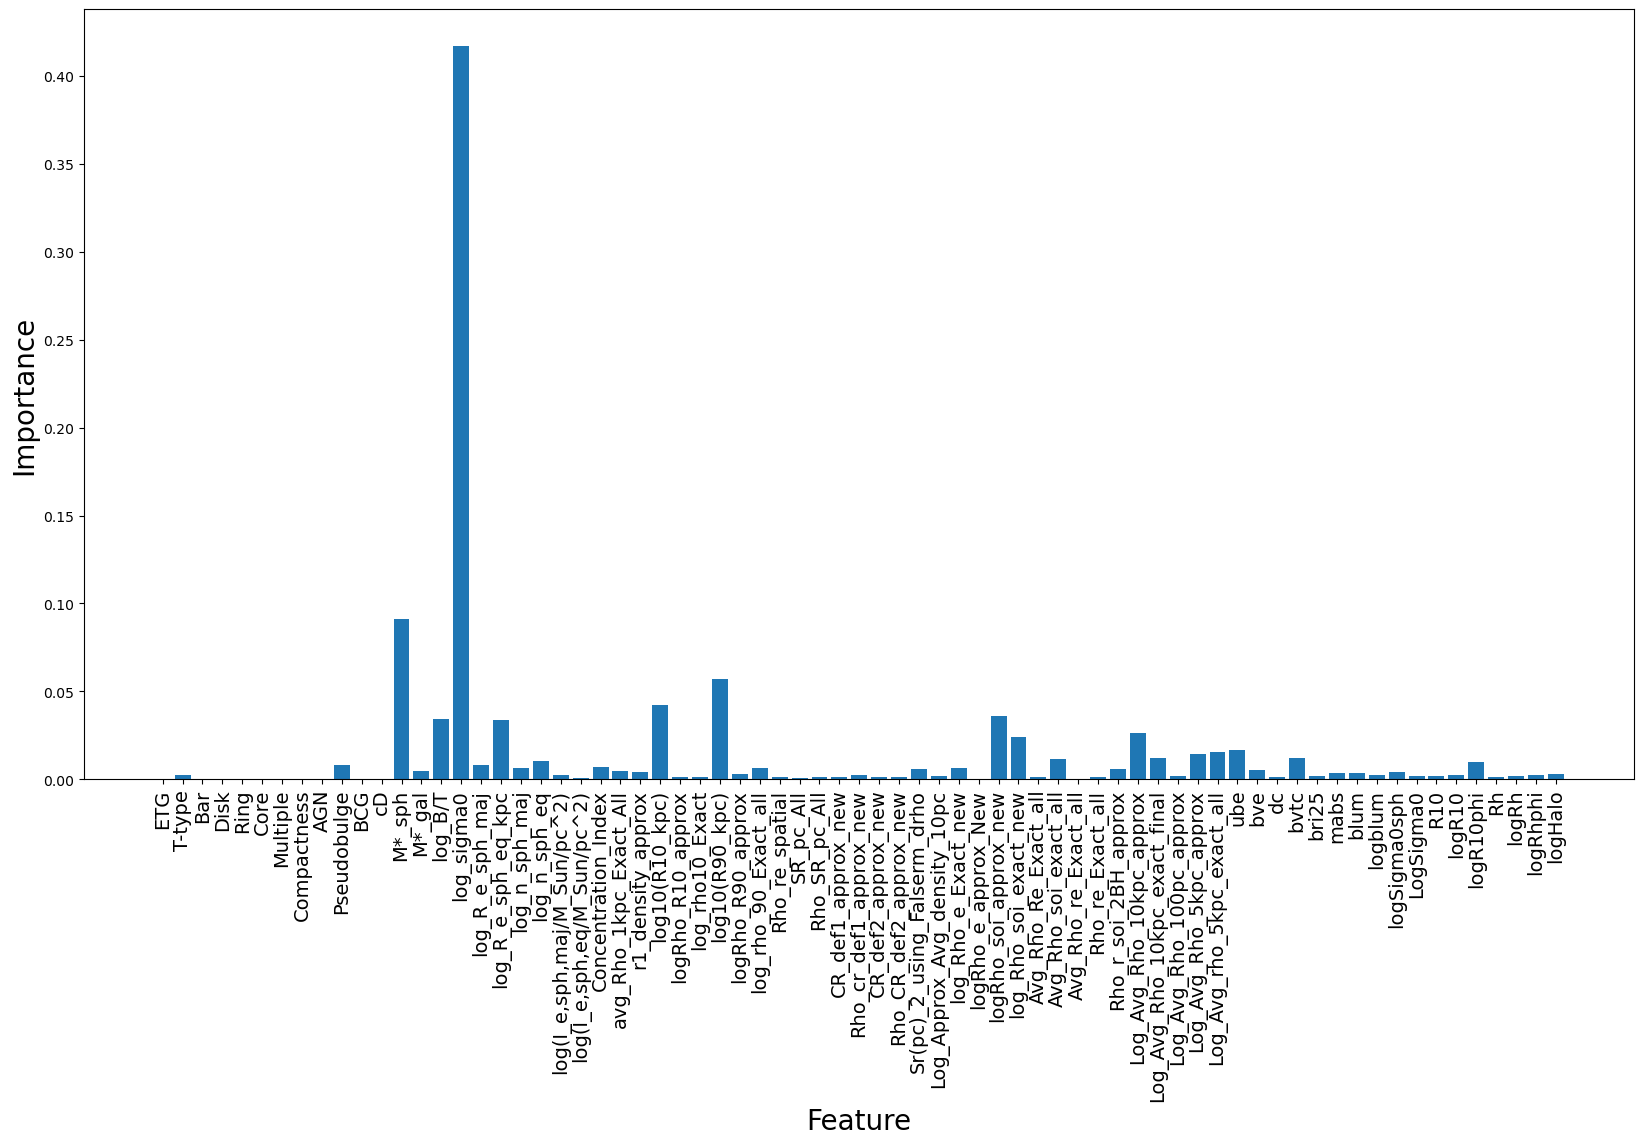

In [5]:
keys = low_scatter_para.copy()
keys.remove('M_BH')
keys.remove('M_BH_std')

df = df_low_scatter.copy()
X = df[keys]
y = df['M_BH']


# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X, y)

w = 1/(df['M_BH_std'].to_numpy())**2
wrmse = functions.wrmse(y,rf_regressor.predict(X),w)

print("WRMSE: ",wrmse)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [6]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 log_sigma0 0.416934322170686
2 M*_sph 0.0913558607885826
3 log10(R90_kpc) 0.05712357604061172
4 log10(R10_kpc) 0.04253299332884611
5 logRho_soi_approx_new 0.035826047344633564
6 log_B/T 0.034569707245689314
7 log_R_e_sph_eq_kpc 0.033492396168955066
8 Log_Avg_Rho_10kpc_approx 0.02645035985366325
9 log_Rho_soi_exact_new 0.02424744839154304
10 ube 0.01648790989923672
11 Log_Avg_rho_5kpc_exact_all 0.015453857900918093
12 Log_Avg_Rho_5kpc_approx 0.01430416150350721
13 Log_Avg_Rho_10kpc_exact_final 0.012057659993922394
14 bvtc 0.012013676387095886
15 Avg_Rho_soi_exact_all 0.011668530104399142
16 log_n_sph_eq 0.010447962393026427
17 logR10phi 0.00967892056558786
18 Pseudobulge 0.00811790641133648
19 log_R_e_sph_maj 0.00804894945679885
20 Concentration_Index 0.00702552204497574
21 log_rho_90_Exact_all 0.006726781159830043
22 log_Rho_e_Exact_new 0.006514030725056213
23 log_n_sph_maj 0.006428906757191386
24 Sr(pc)_2_using_Falserm_drho 0.006085691912435143
25 Rho_r_soi_2BH_approx 0.005665841116

In [7]:
X.columns[importance_order][:10]

Index(['log_sigma0', 'M*_sph', 'log10(R90_kpc)', 'log10(R10_kpc)',
       'logRho_soi_approx_new', 'log_B/T', 'log_R_e_sph_eq_kpc',
       'Log_Avg_Rho_10kpc_approx', 'log_Rho_soi_exact_new', 'ube'],
      dtype='object')

In [8]:
top_ten=np.array(X.columns[importance_order][:10]).tolist()

In [9]:
model=functions.test_relation(top_ten.copy(),return_model=True,maxsize=17,ncyclesperiteration=5000,niterations=1000)

104


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : M*_sph
x 2 : log10(R90_kpc)
x 3 : log10(R10_kpc)
x 4 : logRho_soi_approx_new
x 5 : log_B/T
x 6 : log_R_e_sph_eq_kpc
x 7 : Log_Avg_Rho_10kpc_approx
x 8 : log_Rho_soi_exact_new
x 9 : ube
Eq. selected rmse: 0.14315046448663277


x0*(x0*(-x4 + x8) - 0.1768884992195732*x4 + 4.216273857128545)

Eq. 0 rmse: 0.9172014405196003


8.252746645955588

Eq. 1 rmse: 0.4094850455557965


x1 - 2.3574217941224047

Eq. 2 rmse: 0.34690714276761764


3.9052999874188177*x0 + x3

Eq. 3 rmse: 0.28269745821602016


4.153790636782851*x0 - 0.4247802010108821*x4

Eq. 4 rmse: 0.20015119680353013


x0*(-1.1942504606930784*x4 + x8 + 4.2108450180166885)

Eq. 5 rmse: 0.17171319670446278


(4.216273857128545 - 0.18461948893913263*x4)*(x0 - x4 + x8)

Eq. 6 rmse: 0.14315046448663277


x0*(x0*(-x4 + x8) - 0.1768884992195732*x4 + 4.216273857128545)

Eq. 7 rmse: 0.13734079190495677


x0*(-0.1766694510629877*x4 + (x0 + x2)*(-x4 + x8) + 4.236857865544556)

Eq. 8 rmse: 0.13398266910228057


x0*(-0.17453039981125573*x8 + (-x4 + x8)*(x0 + x2 + x9) + 4.236857865544556)

In [43]:
easy_obs_para=['LogSigma0','Concentration_Index','logSigma0sph','log_sigma0','dc','logRhphi','M*_sph','ube','bri25','bve','bvtc','logR10phi','M*_gal','log_B/T',
 'logRh','log_n_sph_eq','blum','log_R_e_sph_maj','logblum','log_n_sph_maj','logR10','Pseudobulge','AGN','Multiple','Ring','BCG','Disk','cD',
 'Bar','Core','Compactness','ETG','T-type','M_BH','log10(R10_kpc)','log10(R90_kpc)']
easy_obs_para.append('M_BH_std')

In [44]:
len(easy_obs_para)

37

In [10]:
df_full = pd.read_csv('SMBH_Data_0911.csv',header=1)
df_easy_obs = df_full[easy_obs_para].dropna(axis='index',how='any')
len(df_easy_obs)

100

WRMSE:  0.15446464924906603


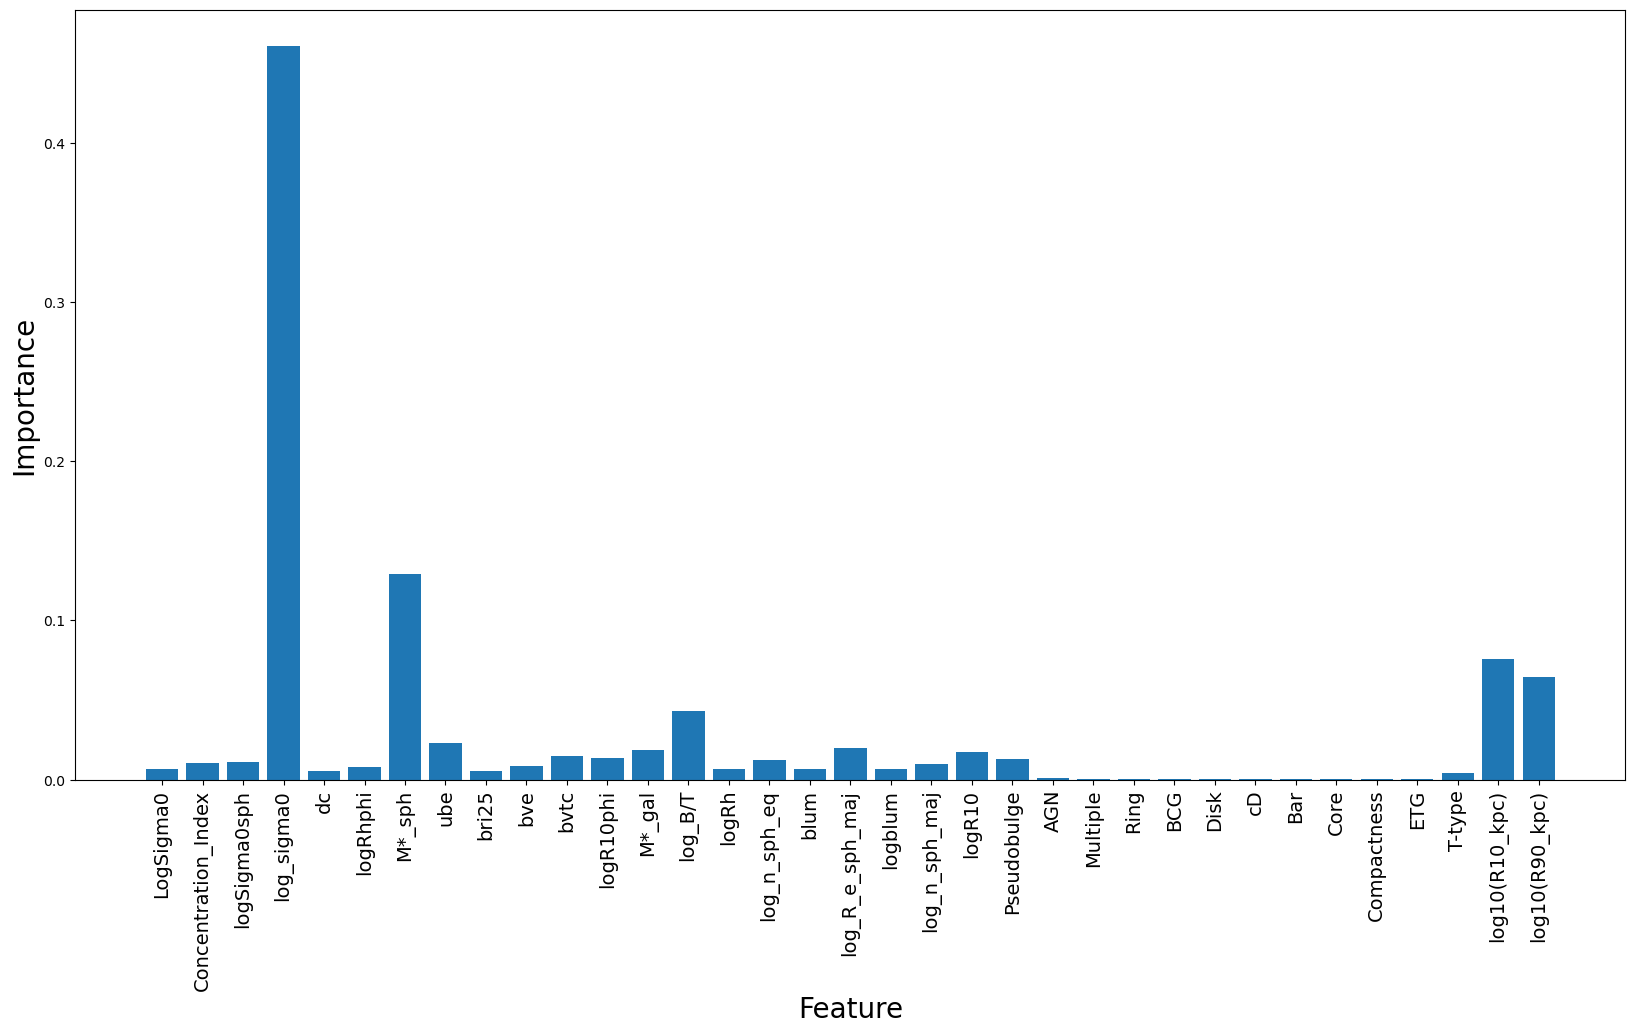

In [11]:
keys = easy_obs_para.copy()
keys.remove('M_BH')
keys.remove('M_BH_std')


df = df_easy_obs.copy()
X = df[keys]
y = df['M_BH']


# Create a Random Forest Regressor
n_estimators = 100  # Number of trees in the forest
max_depth = None    # Maximum depth of the trees (None means unlimited)
random_state = 0    # Random seed for reproducibility

rf_regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)

# Fit the model to the training data
rf_regressor.fit(X, y)

w = 1/(df['M_BH_std'].to_numpy())**2
wrmse = functions.wrmse(y,rf_regressor.predict(X),w)

print("WRMSE: ",wrmse)

# Get feature importances
feature_importances = rf_regressor.feature_importances_

x_ticks_labels = X.columns
x_ticks=np.arange(len(feature_importances))
# Plot feature importances
plt.figure(figsize=(20, 10))
plt.bar(range(X.shape[1]), feature_importances, align="center")
plt.xlabel("Feature",fontsize=20)
plt.ylabel("Importance",fontsize=20)
plt.xticks(ticks=x_ticks,labels=x_ticks_labels, rotation=90, fontsize=14)
plt.show()

In [6]:
importance_order=feature_importances.argsort()[::-1]
importance=np.sort(feature_importances)[::-1]
#importance_order
for i in range(len(importance_order)):
    print(i+1,X.columns[importance_order[i]],importance[i])

1 log_sigma0 0.46050839022981443
2 M*_sph 0.13090126734839744
3 log10(R10_kpc) 0.07610113303707118
4 log10(R90_kpc) 0.0646228952662358
5 log_B/T 0.04339881316086118
6 ube 0.022644995418486063
7 log_R_e_sph_maj 0.019743608180881035
8 M*_gal 0.017295882688103406
9 logR10 0.016768259147482818
10 bvtc 0.016530422351772985
11 log_n_sph_eq 0.016024622422335957
12 logR10phi 0.013416021241317005
13 Pseudobulge 0.012795277573994634
14 logSigma0sph 0.01191509700016517
15 Concentration_Index 0.011109926956086837
16 bve 0.008567882694444369
17 logRhphi 0.008147896185317308
18 LogSigma0 0.0072154878209225014
19 blum 0.006147206953122358
20 logRh 0.006132039454931457
21 logblum 0.006047304661696721
22 log_n_sph_maj 0.0056185768450176775
23 dc 0.0052839975820163565
24 bri25 0.0042917428585312325
25 T-type 0.004148358350981187
26 AGN 0.0014243275494226107
27 Bar 0.0008943900329119212
28 Disk 0.000525484022312428
29 Ring 0.0004520142736648507
30 BCG 0.0004338900582381965
31 ETG 0.0003456380225792237
32

In [7]:
top_ten=np.array(X.columns[importance_order][:10]).tolist()

In [9]:
model=functions.test_relation(top_ten.copy(),return_model=True,maxsize=15)

100


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1761: UserWarning: Note: you are running with 10 features or more. Genetic algorithms like used in PySR scale poorly with large numbers of features. Consider using feature selection techniques to select the most important features (you can do this automatically with the `select_k_features` parameter), or, alternatively, doing a dimensionality reduction beforehand. For example, `X = PCA(n_components=6).fit_transform(X)`, using scikit-learn's `PCA` class, will reduce the number of features to 6 in an interpretable way, as each resultant feature will be a linear combination of the original features. 
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : M*_sph
x 2 : log10(R10_kpc)
x 3 : log10(R90_kpc)
x 4 : log_B/T
x 5 : ube
x 6 : log_R_e_sph_maj
x 7 : M*_gal
x 8 : logR10
x 9 : bvtc
Eq. selected rmse: 0.3132622741779796


x0*(0.28295250585736492*x6 + 3.5341620211842035)

Eq. 0 rmse: 0.9082611474700466


8.233873226496327

Eq. 1 rmse: 0.3773721087118079


x1 - 2.375731932809976

Eq. 2 rmse: 0.3521978998038177


1.1931421834727791*x1 - 4.4248942388511665

Eq. 3 rmse: 0.3132622741779796


x0*(0.28295250585736492*x6 + 3.5341620211842035)

Eq. 4 rmse: 0.30826383925150463


x0*(5.010748903359208 + (x6 - 14.79958163205317)/x1)

Eq. 5 rmse: 0.30231598441772733


3.537065198730993*x0 + 5.132832143229276*x6*x8/x1

Eq. 6 rmse: 0.2945549834520636


x0*(x6*x8/(1.479350993047594*x6 + 3.532639864385066) + 3.532639864385066)

Eq. 7 rmse: 0.28161900544269197


x0*(x6*x8/(-x3*(-x3 + x4) + 2.2296990220408737) + 3.532639864385066)

In [8]:
top_ten

['log_sigma0',
 'M*_sph',
 'log10(R10_kpc)',
 'log10(R90_kpc)',
 'log_B/T',
 'ube',
 'log_R_e_sph_maj',
 'M*_gal',
 'logR10',
 'bvtc']

In [12]:
model=functions.test_relation(['log_sigma0','M*_sph','log_B/T','log_R_e_sph_maj','bvtc','Pseudobulge'],return_model=True)

105


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : M*_sph
x 2 : log_B/T
x 3 : log_R_e_sph_maj
x 4 : bvtc
x 5 : Pseudobulge
Eq. selected rmse: 0.3373067497921037


x0 + x1 - 4.649272074707542

Eq. 0 rmse: 0.9105692749834979


8.220426565879444

Eq. 1 rmse: 0.3858334980071181


x1 - 2.3945268652882032

Eq. 2 rmse: 0.3373067497921037


x0 + x1 - 4.649272074707542

Eq. 3 rmse: 0.30973851689683335


x0 + x1 - 0.29743921596529055*x5 - 4.649272074705958

Eq. 4 rmse: 0.3089200798023601


x0 + x1 - 0.37485551497858744*x5 - 4.649272074705958

Eq. 5 rmse: 0.3037229138265125


x0 + x1 + x5/(-x0 - 0.27887560496053493) - 4.586309602618977

Eq. 6 rmse: 0.3021873296222127


x0 + x1 + x5/(-x0 - 0.7641939550500892*x3**2) - 4.586309602618977

Eq. 7 rmse: 0.2820429330772882


x0**2 + x0 - 22.546616751141006*x0/(x1 - x5) + 5.7194367972639295

Eq. 8 rmse: 0.2761480218827659


x0**2 - 5.262239040680896*x0**2/(x1 + x2 + x3 - x5) + x0 + 3.442312011012387

In [16]:
model=functions.test_relation(['log_sigma0','M*_sph','log_B/T','log_R_e_sph_maj','bvtc','Pseudobulge'],return_model=True,maxsize=15,ncyclesperiteration=5000,niterations=1000)

105


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : M*_sph
x 2 : log_B/T
x 3 : log_R_e_sph_maj
x 4 : bvtc
x 5 : Pseudobulge
Eq. selected rmse: 0.3373067497921036


x0 + x1 - 4.649272074700074

Eq. 0 rmse: 0.9105692749834978


8.22042656587739

Eq. 1 rmse: 0.3858334980071179


x1 - 2.3945268653508647

Eq. 2 rmse: 0.3373067497921036


x0 + x1 - 4.649272074700074

Eq. 3 rmse: 0.3095040111889643


x1 + (-x5 - 5.220883304071402)/x0

Eq. 4 rmse: 0.30387644162307587


x0 + x1 - 0.4187824174909826*x5 - 4.5895796522317545

Eq. 5 rmse: 0.2828953619583616


0.67786022670371077*x0**2 + 0.45451938288893206*x1 - 0.45451938288893206*x5

Eq. 6 rmse: 0.2822711800811613


0.69477014616598549*x0**2 + 0.45869386069019423*x1 - 0.45869386069019423*x5 - 0.13159915991860752

Eq. 7 rmse: 0.27735397113364757


0.6748426891099021*x0**2 + 0.455939909474433*x1 + 0.455939909474433*x5*(x3 - 0.9078018579059055)

In [34]:
def AIC(k,L):
    return 2*k-2*np.log(L)

def BIC(k,L,n):
    return np.log(n)*k-2*np.log(L)

catalog=functions.catalog

# log likelihood for linear regression
def log_likelihood(y,y_pred,w):
    residuals = np.sqrt(w) * (y - y_pred)
    sigma2 = np.var(residuals)
    n = len(y)
    log_likelihood = -n/2 * np.log(2 * np.pi * sigma2) - 1/(2 * sigma2) * np.sum(residuals**2)
    return log_likelihood


def test_AIC_BIC(paras,model,obs=pd.read_csv(catalog,header=1)):
    k=len(paras)

    if paras[-1]!='M_BH':
        paras.append('M_BH')

    paras.append('M_BH_std')

    obs = obs[paras].dropna(axis='index',how='any')
    print(len(obs))

    y=obs['M_BH'].to_numpy()
    yerr=obs['M_BH_std'].to_numpy()
    w = 1/yerr**2

    x=[]
    for i in range(len(paras)-2):
        x.append(obs.iloc[:,i].to_numpy())


    y_pred=model(*x)
    L=np.exp(log_likelihood(y,y_pred,w))
    AIC_value=AIC(k,L)
    BIC_value=BIC(k,L,len(y))
    print("log likelihood:",np.log(L))
    print("AIC: ",AIC_value)
    print("BIC: ",BIC_value)
    return AIC_value,BIC_value

In [35]:
test_AIC_BIC(['log_sigma0'],old_relations.m_sigma_relation)

143
log likelihood: -488.7553557908624
AIC:  979.5107115817248
BIC:  982.4735562119847


(979.5107115817248, 982.4735562119847)

In [38]:
test_AIC_BIC(['M*_sph'],old_relations.m_msph_relation)

124
log likelihood: -428.7123113702994
AIC:  859.4246227405988
BIC:  862.2449043062038


(859.4246227405988, 862.2449043062038)

In [39]:
test_AIC_BIC(['log_B/T'],old_relations.m_bt_relation)

124
log likelihood: -459.73565561304736
AIC:  921.4713112260947
BIC:  924.2915927916997


(921.4713112260947, 924.2915927916997)

In [40]:
test_AIC_BIC(['logRho_soi_approx_new'],old_relations.m_rho_soi_relation)

122
log likelihood: -474.61754776266844
AIC:  951.2350955253369
BIC:  954.0391165700702


(951.2350955253369, 954.0391165700702)

In [ ]:
test_AIC_BIC(['logRho_soi_approx_new'],old_relations.m_rho_soi_relation)

In [36]:
test_AIC_BIC(['log_sigma0','log_B/T','logRho_soi_approx_new'],new_relations.sigma_bt_rho_relation)

122
log likelihood: -353.66199224251113
AIC:  713.3239844850223
BIC:  721.7360476192221


(713.3239844850223, 721.7360476192221)

In [41]:
test_AIC_BIC(['log_sigma0','log_R_e_sph_eq_kpc','logRho_soi_approx_new','bvtc'],new_relations.sigma_r_rho_bvc_relation)

104
log likelihood: -300.54772956257375
AIC:  609.0954591251475
BIC:  619.673022721713


(609.0954591251475, 619.673022721713)

In [42]:
test_AIC_BIC(['log_sigma0','log_B/T','logRho_soi_approx_new','Pseudobulge'],new_relations.sigma_bt_rho_pseudobulge_relation)

122
log likelihood: -335.21263121147183
AIC:  678.4252624229437
BIC:  689.6413466018766


(678.4252624229437, 689.6413466018766)

In [37]:
test_AIC_BIC(['log_sigma0','M*_sph','Pseudobulge'],new_relations.sigma_Msph_pseudobulge_relation)

124
log likelihood: -392.3703293919796
AIC:  790.7406587839592
BIC:  799.2015034807744


(790.7406587839592, 799.2015034807744)

In [24]:
functions.test_AIC_BIC(['log_sigma0','log_R_e_sph_maj','Pseudobulge'],new_relations.sigma_Re_maj_Pseudobulge_relation)

125
log likelihood: -381.8319059895843
AIC:  769.6638119791686
BIC:  778.1487531910755


(769.6638119791686, 778.1487531910755)

In [14]:
functions.test_relation(['log_sigma0','M*_sph','Pseudobulge'],return_model=True,maxsize=10)

124


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : M*_sph
x 2 : Pseudobulge
Eq. selected rmse: 0.32812347245959916


x0 + x1 - 0.5571484278453378*x2 - 4.571432867847466

Eq. 0 rmse: 0.9916069688267427


8.053185584331693

Eq. 1 rmse: 0.4914332708977886


x1 - 2.4848326407965464

Eq. 2 rmse: 0.40297595016468696


x1 - x2 - 2.210723881674869

Eq. 3 rmse: 0.3706315340272637


x0 + x1 - x1/x0

Eq. 4 rmse: 0.32812347245959916


x0 + x1 - 0.5571484278453378*x2 - 4.571432867847466

Eq. 5 rmse: 0.29526144310999414


(-x0 - 1.6103471995124832)*(-0.1774925324682827*x1 + 0.1774925324682827*x2 - 0.26342221120747735)

PySRRegressor.equations_ = [
	   pick     score                                           equation  \
	0        0.000000                                  8.053185584331693   
	1        0.702001                         (x1 + -2.4848326407965464)   
	2        0.198449                    ((x1 - 2.210723881674869) - x2)   
	3        0.083668                            (x1 + (x0 - (x1 / x0)))   
	4  >>>>  0.121818  (x1 + ((x0 - (x2 * 0.5571484278453378)) - 4.57...   
	5        0.105529  ((((x1 - -1.4841312338283865) - x2) * -0.17749...   
	
	       loss  complexity  
	0  0.983284           1  
	1  0.241507           3  
	2  0.162390           5  
	3  0.137368           7  
	4  0.107665           9  
	5  0.087179          11  
]

124


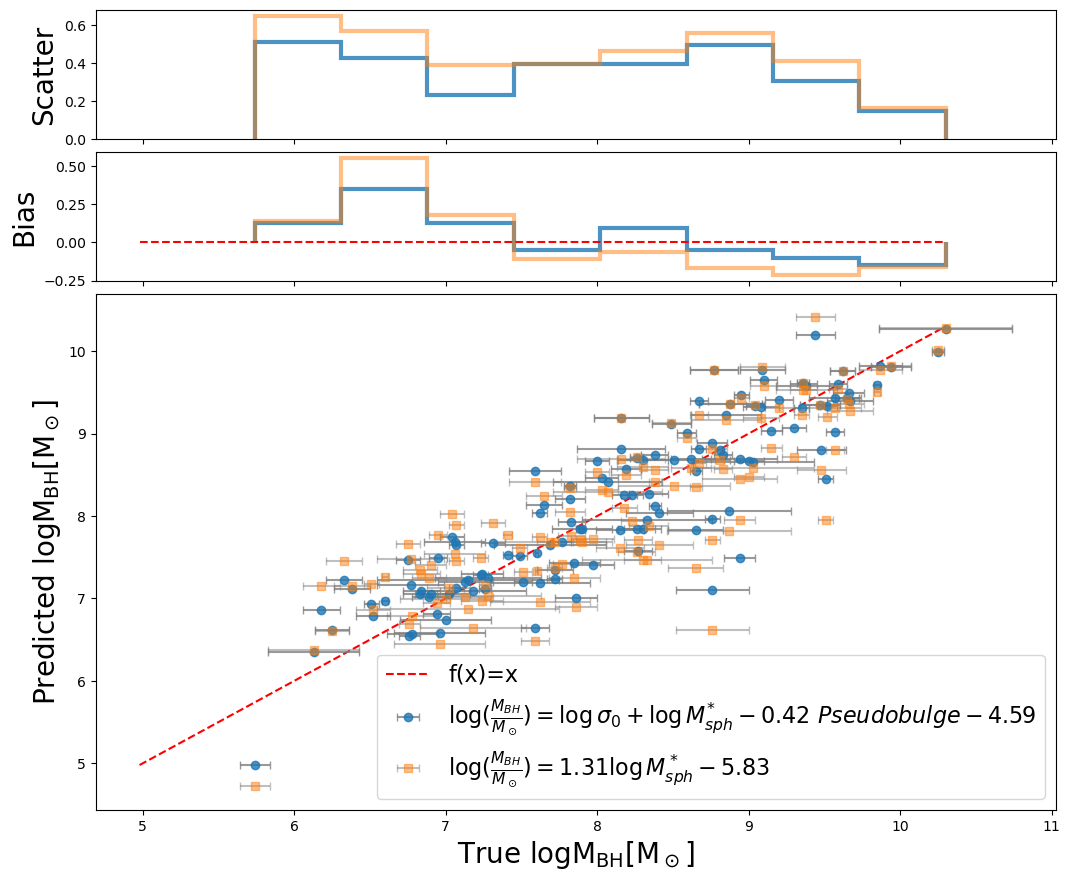

N-D relation wrmse: 0.3344632336899722
1-D relation wrmse: 0.44837110383115697


In [30]:
functions.plot_relation(['log_sigma0','M*_sph','Pseudobulge'],new_relations.sigma_Msph_pseudobulge_relation,label=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=\log \sigma_0 + \log {M}^{*}_{{sph}} - 0.42 \ {Pseudobulge} - 4.59$',
                        reference='M*_sph',reference_relation=old_relations.m_msph_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=1.31 \log M^*_{sph} - 5.83$')

In [17]:
functions.test_relation(['log_sigma0','log_R_e_sph_maj'],maxsize=10,ncyclesperiteration=5000,niterations=300)

125


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : log_R_e_sph_maj
Eq. selected rmse: 0.3786394045171592


3.4546388124252756*x0 + x1

Eq. 0 rmse: 0.9913806803905946


8.052865790112872

Eq. 1 rmse: 0.5092330858480146


3.606546178900916*x0

Eq. 2 rmse: 0.3786394045171592


3.4546388124252756*x0 + x1

Eq. 3 rmse: 0.34718130591726637


x0*(0.3024728136367804*x1 + 3.4944023050929274)

Eq. 4 rmse: 0.34044491904503243


x0**2 + 0.48628272626914626*x1 + 2.858921863624911

Eq. 5 rmse: 0.33833178864231733


0.9271154736686101*x0**2 + 0.5607269304350105*x1 + 3.2029708446894385

In [ ]:
functions.plot_relation(['log_sigma0','log_R_e_sph_maj'],new_relations.sigma_Re_maj_relation,label=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=$0.93 (\log \sigma_0)^2 + 0.56 \log R_{e,sph,maj} + 3.2)$',
                        reference='log_R_e_sph_maj',reference_relation=old_relations.m_Re_maj_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=1.51 \log R_{e,sph,maj} + 7.61$')

In [18]:
functions.test_relation(['log_sigma0','M*_sph','Pseudobulge','log_R_e_sph_maj'],maxsize=15,ncyclesperiteration=5000,niterations=300)

124


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : M*_sph
x 2 : Pseudobulge
x 3 : log_R_e_sph_maj
Eq. selected rmse: 0.2950594170385555


x0*(-0.21931154741162634*x2 + 0.21931154741162634*x3 + 3.5817154196634156)

Eq. 0 rmse: 0.9916069688267426


8.053185584332743

Eq. 1 rmse: 0.4914332708977886


x1 - 2.4848326407978716

Eq. 2 rmse: 0.3779645124386588


3.4543983442390216*x0 + x3

Eq. 3 rmse: 0.34673410332553345


x0*(0.3028962041138201*x3 + 3.494052520911875)

Eq. 4 rmse: 0.2950594170385555


x0*(-0.21931154741162634*x2 + 0.21931154741162634*x3 + 3.5817154196634156)

Eq. 5 rmse: 0.29148468816464335


x0 + x1 - (x1 + x2 - 0.2635666521557802)/x0

Eq. 6 rmse: 0.2804583034067555


x0 + x1 - (22.802555252892695 - 131.8842062751253/(x1 + x2))/x0

In [20]:
functions.test_relation(['log_sigma0','Pseudobulge','log_R_e_sph_maj'],maxsize=15)

125


/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


parameters:
x 0 : log_sigma0
x 1 : Pseudobulge
x 2 : log_R_e_sph_maj
Eq. selected rmse: 0.30411566511775545


3.606546177254041*x0 - 0.451458925645118*x1 + 0.451458925645118*x2

Eq. 0 rmse: 0.9913806803905947


8.052865790111266

Eq. 1 rmse: 0.5092330858480147


3.606546177254041*x0

Eq. 2 rmse: 0.39012570589102685


3.6968823251763861*x0 - x1

Eq. 3 rmse: 0.3733163257026697


3.6968823251763861*x0 - 0.84849676024646508*x1

Eq. 4 rmse: 0.30411566511775545


3.606546177254041*x0 - 0.451458925645118*x1 + 0.451458925645118*x2

Eq. 5 rmse: 0.3008529364292625


3.589249391739994*x0 - 0.50273659760562763*x1 + 0.50273659760562763*x2

Eq. 6 rmse: 0.2917203399843684


(0.8160996968478138*x0 - 0.18042226396359207)*(-0.26259063279907224*x1 + 0.26259063279907224*x2 + 4.867311781585665)

125


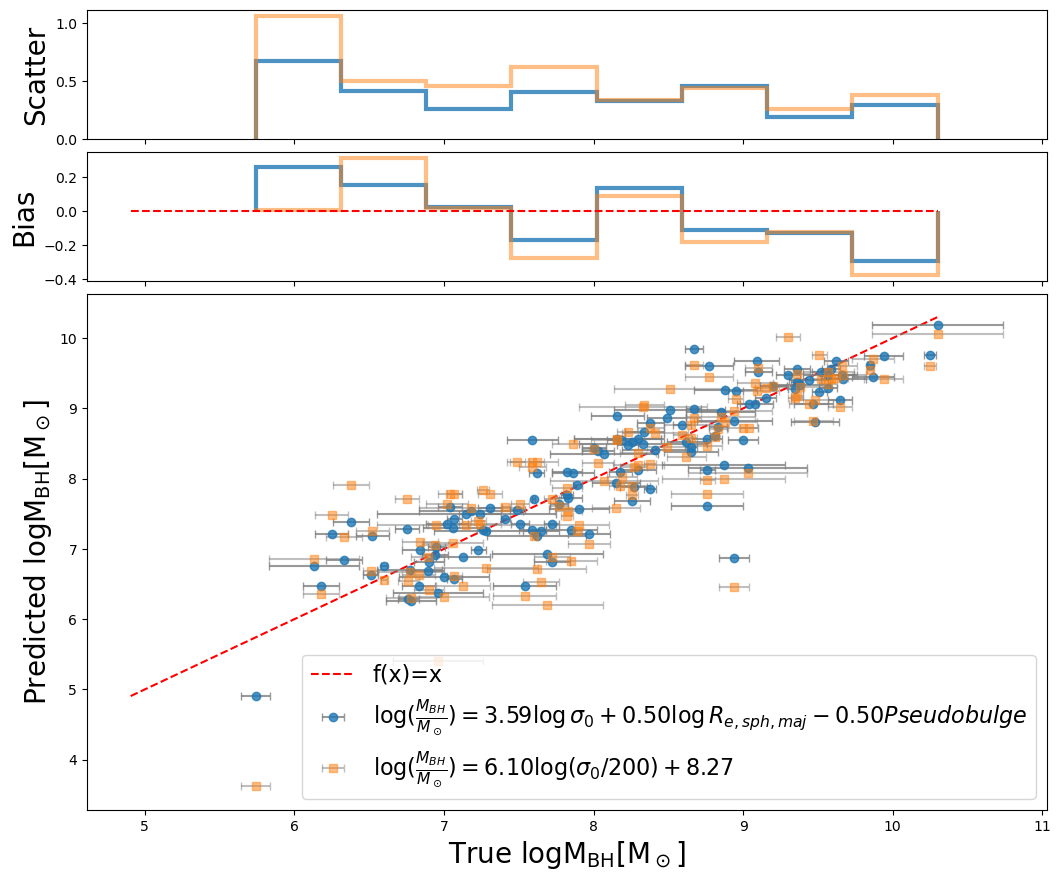

N-D relation wrmse: 0.3008529364292625
1-D relation wrmse: 0.4478710733325799


In [29]:
functions.plot_relation(['log_sigma0','log_R_e_sph_maj','Pseudobulge'],new_relations.sigma_Re_maj_Pseudobulge_relation,label=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=3.59 \log \sigma_0 + 0.50 \log R_{e,sph,maj} - 0.50 {Pseudobulge}$',
                        reference='log_sigma0',reference_relation=old_relations.m_sigma_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=6.10 \log (\sigma_0/200)+8.27$')

125


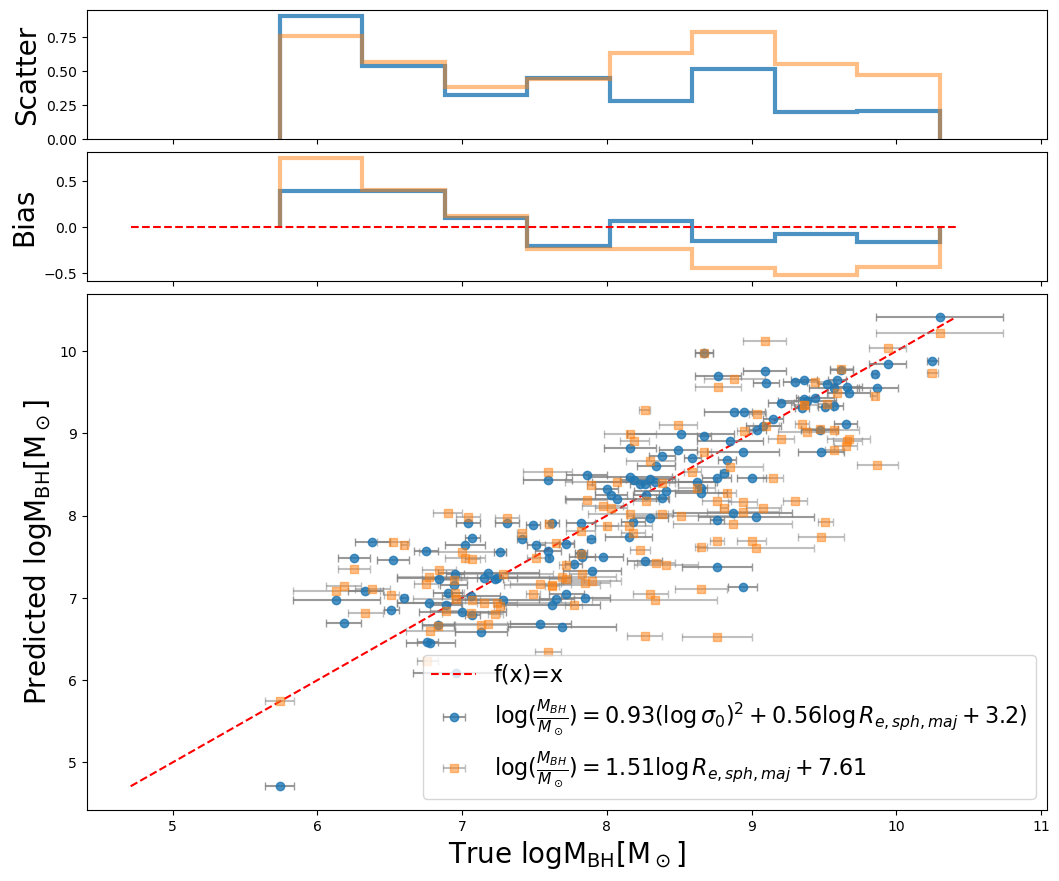

N-D relation wrmse: 0.33833178864231733
1-D relation wrmse: 0.5893280571477097


In [28]:
functions.plot_relation(['log_sigma0','log_R_e_sph_maj'],new_relations.sigma_Re_maj_relation,label=r'$\log (\frac{{M}_{BH}}{{M}_\odot}) = 0.93 (\log \sigma_0)^2 + 0.56 \log R_{e,sph,maj} + 3.2)$',
                        reference='log_R_e_sph_maj',reference_relation=old_relations.m_Re_maj_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})=1.51 \log R_{e,sph,maj} + 7.61$')